## 作业描述：

### 请在最下方提示位置补充代码，对爬取的《乘风破浪的姐姐》参赛嘉宾的身高分布情况进行可视化分析，绘制身高分布饼状图，如下图所示：

#### **tips**:分为身高<=165cm，165cm<身高<=170cm,身高>170cm

![](https://ai-studio-static-online.cdn.bcebos.com/dc969ba7993d4e90b9f7ad6ad188a3b95e5e65d6a4e84981abee83c164ca2378)

## 任务描述

### 本次实践使用Python来爬取百度百科中《乘风破浪的姐姐》所有选手的信息，并进行可视化分析。

### 数据获取：https://baike.baidu.com/item/乘风破浪的姐姐

<br/>
<br/>


<img src ="https://ai-studio-static-online.cdn.bcebos.com/4045188efbe64efaabde5a19e1cd74146d023bda015d443aabd6db235b769aac" height='500' width='500'/>
<img src="https://ai-studio-static-online.cdn.bcebos.com/815adadb100447cd8269f5ab8f195bfa9672a1d7d6044159a67587fb1da31a92" height='500' width='500' />


<br/>
<br/>


<br/>

**上网的全过程:**

    普通用户:

    打开浏览器 --> 往目标站点发送请求 --> 接收响应数据 --> 渲染到页面上。

    爬虫程序:

    模拟浏览器 --> 往目标站点发送请求 --> 接收响应数据 --> 提取有用的数据 --> 保存到本地/数据库。


**爬虫的过程**：

    1.发送请求（requests模块）

    2.获取响应数据（服务器返回）

    3.解析并提取数据（BeautifulSoup查找或者re正则）

    4.保存数据




<br/>

**本实践中将会使用以下两个模块，首先对这两个模块简单了解以下：**

<br/>

**request模块：**

    requests是python实现的简单易用的HTTP库，官网地址：http://cn.python-requests.org/zh_CN/latest/
    
    requests.get(url)可以发送一个http get请求，返回服务器响应内容。
    
    





<br/>

**BeautifulSoup库：**

    BeautifulSoup 是一个可以从HTML或XML文件中提取数据的Python库。网址：https://beautifulsoup.readthedocs.io/zh_CN/v4.4.0/
    
    BeautifulSoup支持Python标准库中的HTML解析器,还支持一些第三方的解析器,其中一个是 lxml。
    
    BeautifulSoup(markup, "html.parser")或者BeautifulSoup(markup, "lxml")，推荐使用lxml作为解析器,因为效率更高。

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# !mkdir /home/aistudio/external-libraries
# !pip install beautifulsoup4 -t /home/aistudio/external-libraries
# !pip install lxml -t /home/aistudio/external-libraries

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
     |████████████████████████████████| 122kB 11.4MB/s eta 0:00:01
Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
     |████████████████████████████████| 5.5MB 236kB/s eta 0:00:011


In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
import sys
sys.path.append('/home/aistudio/external-libraries')

## 数据爬取
## 一、爬取百度百科中《乘风破浪的姐姐》中所有参赛嘉宾信息，返回页面数据

In [ ]:
import json
import re
import requests
import datetime
from bs4 import BeautifulSoup
import os


def crawl_wiki_data():
    """
    爬取百度百科中《乘风破浪的姐姐》中嘉宾信息，返回html
    """
    headers = { 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
    }
    url='https://baike.baidu.com/item/乘风破浪的姐姐'                         

    try:
        response = requests.get(url,headers=headers)
        #将一段文档传入BeautifulSoup的构造方法,就能得到一个文档的对象, 可以传入一段字符串
        soup = BeautifulSoup(response.text,'lxml')     
          
        #返回所有的<table>所有标签
        tables = soup.find_all('table')
        crawl_table_title = "按姓氏首字母排序"
        for table in  tables:           
            #对当前节点前面的标签和字符串进行查找
            table_titles = table.find_previous('div')
            for title in table_titles:
                if(crawl_table_title in title):
                    return table       
    except Exception as e:
        print(e)



## 二、对爬取的参赛嘉宾页面数据进行解析，并保存为JSON文件

In [ ]:
def parse_wiki_data(table_html):
    '''
    解析得到选手信息，包括包括选手姓名和选手个人百度百科页面链接，存JSON文件,保存到work目录下
    '''
    bs = BeautifulSoup(str(table_html),'lxml')
    all_trs = bs.find_all('tr')

    stars = []
    for tr in all_trs:
         all_tds = tr.find_all('td')   #tr下面所有的td          

         for td in  all_tds:
             #star存储选手信息，包括选手姓名和选手个人百度百科页面链接
             star = {}    
             if td.find('a'):
                 #找选手名称和选手百度百科连接
                 if td.find_next('a'):
                    star["name"]=td.find_next('a').text
                    star['link'] =  'https://baike.baidu.com' + td.find_next('a').get('href')

                 elif td.find_next('div'):
                     star["name"]=td.find_next('div').find('a').text
                     star['link'] = 'https://baike.baidu.com' + td.find_next('div').find('a').get('href')
                 stars.append(star)
      
    json_data = json.loads(str(stars).replace("\'","\""))   
    with open('work/' + 'stars.json', 'w', encoding='UTF-8') as f:
        json.dump(json_data, f, ensure_ascii=False)

## 三、爬取每个选手的百度百科页面的信息，并进行保存

In [ ]:
def crawl_everyone_wiki_urls():
    '''
    爬取每个选手的百度百科图片，并保存
    ''' 
    with open('work/' + 'stars.json', 'r', encoding='UTF-8') as file:
         json_array = json.loads(file.read())
    headers = { 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36' 
     }  
    star_infos = []
    for star in json_array:
        star_info = {}       
        name = star['name']
        link = star['link']
        star_info['name'] = name
        #向选手个人百度百科发送一个http get请求
        response = requests.get(link,headers=headers)        
        #将一段文档传入BeautifulSoup的构造方法,就能得到一个文档的对象
        bs = BeautifulSoup(response.text,'lxml')       
        #获取选手的民族、星座、血型、体重等信息
        base_info_div = bs.find('div',{'class':'basic-info cmn-clearfix'})
        dls = base_info_div.find_all('dl')
        for dl in dls:
            dts = dl.find_all('dt')
            for dt in dts:
                if "".join(str(dt.text).split()) == '民族':
                     star_info['nation'] = dt.find_next('dd').text
                if "".join(str(dt.text).split()) == '星座':
                     star_info['constellation'] = dt.find_next('dd').text
                if "".join(str(dt.text).split()) == '血型':  
                     star_info['blood_type'] = dt.find_next('dd').text
                if "".join(str(dt.text).split()) == '身高':  
                     height_str = str(dt.find_next('dd').text)
                     star_info['height'] = str(height_str[0:height_str.rfind('cm')]).replace("\n","")
                if "".join(str(dt.text).split()) == '体重':  
                     star_info['weight'] = str(dt.find_next('dd').text).replace("\n","")
                if "".join(str(dt.text).split()) == '出生日期':  
                     birth_day_str = str(dt.find_next('dd').text).replace("\n","")
                     if '年' in  birth_day_str:
                         star_info['birth_day'] = birth_day_str[0:birth_day_str.rfind('年')]
        star_infos.append(star_info) 

        #从个人百度百科页面中解析得到一个链接，该链接指向选手图片列表页面
        if bs.select('.summary-pic a'):
            pic_list_url = bs.select('.summary-pic a')[0].get('href')
            pic_list_url = 'https://baike.baidu.com' + pic_list_url
        
        #向选手图片列表页面发送http get请求
        pic_list_response = requests.get(pic_list_url,headers=headers)

        #对选手图片列表页面进行解析，获取所有图片链接
        bs = BeautifulSoup(pic_list_response.text,'lxml')
        pic_list_html=bs.select('.pic-list img ')
        pic_urls = []
        for pic_html in pic_list_html: 
            pic_url = pic_html.get('src')
            pic_urls.append(pic_url)
        #根据图片链接列表pic_urls, 下载所有图片，保存在以name命名的文件夹中
        down_save_pic(name,pic_urls)
        #将个人信息存储到json文件中
        json_data = json.loads(str(star_infos).replace("\'","\""))   
        with open('work/' + 'stars_info.json', 'w', encoding='UTF-8') as f:
            json.dump(json_data, f, ensure_ascii=False)

     

In [ ]:
def down_save_pic(name,pic_urls):
    '''
    根据图片链接列表pic_urls, 下载所有图片，保存在以name命名的文件夹中,
    '''
    path = 'work/'+'pics/'+name+'/'
    if not os.path.exists(path):
      os.makedirs(path)

    for i, pic_url in enumerate(pic_urls):
        try:
            pic = requests.get(pic_url, timeout=15)
            string = str(i + 1) + '.jpg'
            with open(path+string, 'wb') as f:
                f.write(pic.content)
                #print('成功下载第%s张图片: %s' % (str(i + 1), str(pic_url)))
        except Exception as e:
            #print('下载第%s张图片时失败: %s' % (str(i + 1), str(pic_url)))
            print(e)
            continue


## 四、数据爬取主程序

In [7]:
if __name__ == '__main__':

     #爬取百度百科中《乘风破浪的姐姐》中参赛选手信息，返回html
     html = crawl_wiki_data()

     #解析html,得到选手信息，保存为json文件
     parse_wiki_data(html)

     #从每个选手的百度百科页面上爬取,并保存
     crawl_everyone_wiki_urls()

     print("所有信息爬取完成！")

所有信息爬取完成！


# 数据分析

In [8]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
!mkdir /home/aistudio/external-libraries
!pip install matplotlib -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
     |████████████████████████████████| 11.5MB 52.2MB/s eta 0:00:01
     |████████████████████████████████| 92kB 34.7MB/s eta 0:00:01
     |████████████████████████████████| 14.5MB 471kB/s eta 0:00:01
     |████████████████████████████████| 71kB 29.8MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 39.4MB/s eta 0:00:01
     |████████████████████████████████| 235kB 49.9MB/s eta 0:00:01


In [9]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
import sys
sys.path.append('/home/aistudio/external-libraries')

In [11]:
# 下载中文字体
# !wget https://mydueros.cdn.bcebos.com/font/simhei.ttf
# 将字体文件复制到matplotlib字体路径
!cp /home/aistudio/work/simhei.ttf /opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/
# 创建系统字体文件路径
!mkdir .fonts
# 复制文件到该路径
!cp  /home/aistudio/work/simhei.ttf  .fonts/
!rm -rf .cache/matplotlib

## 一、绘制选手年龄分布柱状图

No handles with labels found to put in legend.


['1968', '1970', '1971', '1972', '1980', '1981', '1981', '1982', '1982', '1982', '1982', '1983', '1983', '1983', '1984', '1985', '1986', '1986', '1987', '1987', '1988', '1989', '1989', '1989', '1990', '1990', '1990']
['1968', '1970', '1971', '1972', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990']
[1, 1, 1, 1, 1, 2, 4, 3, 1, 1, 2, 2, 1, 3, 3]


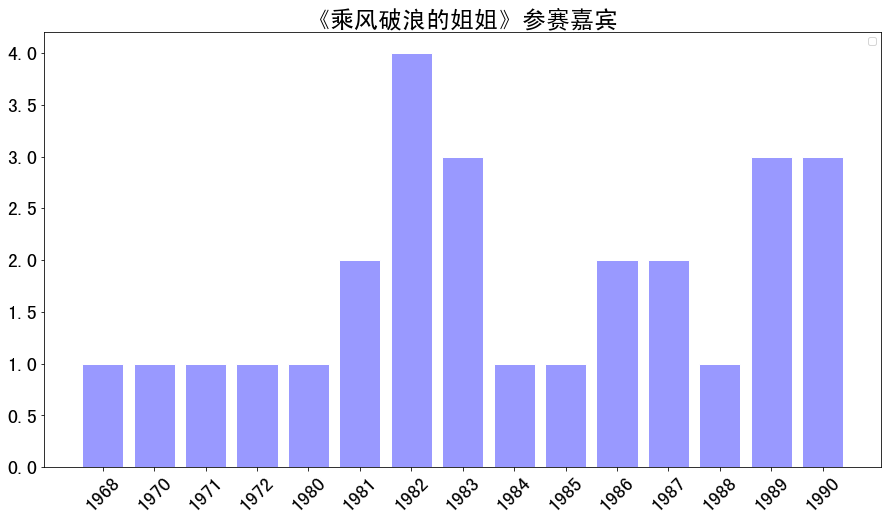

In [12]:
import matplotlib.pyplot as plt
import numpy as np 
import json
import matplotlib.font_manager as font_manager
#显示matplotlib生成的图形
%matplotlib inline

with open('work/stars_info.json', 'r', encoding='UTF-8') as file:
         json_array = json.loads(file.read())

#绘制选手年龄分布柱状图,x轴为年龄，y轴为该年龄的小姐姐数量
birth_days = []
for star in json_array:
    if 'birth_day' in dict(star).keys():
        birth_day = star['birth_day'] 
        if len(birth_day) == 4:  
            birth_days.append(birth_day)

birth_days.sort()
print(birth_days)

birth_days_list = []
count_list = []

for birth_day in birth_days:
    if birth_day not in birth_days_list:
        count = birth_days.count(birth_day)
        birth_days_list.append(birth_day)
        count_list.append(count)

print(birth_days_list)
print(count_list)

# 设置显示中文
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.figure(figsize=(15,8))
plt.bar(range(len(count_list)), count_list,color='r',tick_label=birth_days_list,
            facecolor='#9999ff',edgecolor='white')

# 这里是调节横坐标的倾斜度，rotation是度数，以及设置刻度字体大小
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)

plt.legend()
plt.title('''《乘风破浪的姐姐》参赛嘉宾''',fontsize = 24)
plt.savefig('/home/aistudio/work/result/bar_result01.jpg')
plt.show()


No handles with labels found to put in legend.


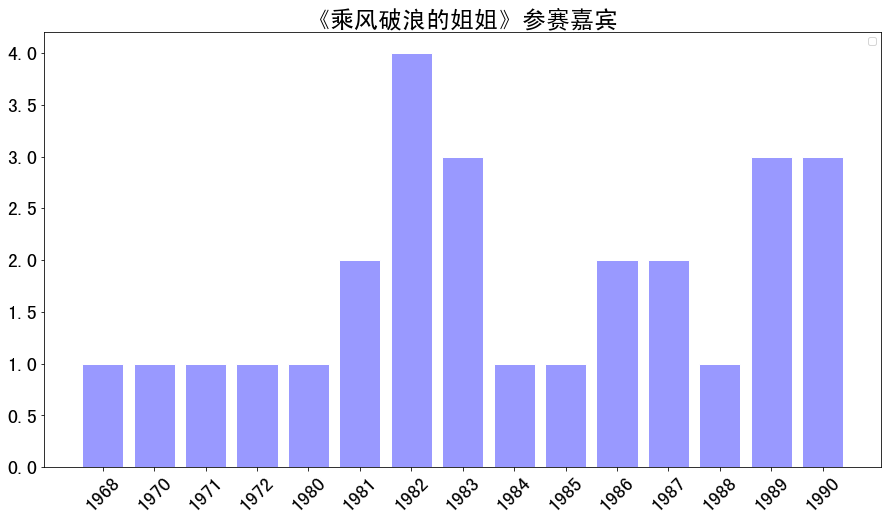

In [13]:
import numpy as np 
import json
import matplotlib.font_manager as font_manager
import pandas as pd
#显示matplotlib生成的图形
%matplotlib inline

df = pd.read_json('work/stars_info.json',dtype = {'birth_day' : str})
#print(df)
df = df[df['birth_day'].map(len) == 4]
#print(df)

grouped=df['name'].groupby(df['birth_day'])
#print(grouped)
s = grouped.count()
birth_days_list = s.index
count_list = s.values

# 设置显示中文
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.figure(figsize=(15,8))
plt.bar(range(len(count_list)), count_list,color='r',tick_label=birth_days_list,
        facecolor='#9999ff',edgecolor='white')
# 这里是调节横坐标的倾斜度，rotation是度数，以及设置刻度字体大小
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.title('''《乘风破浪的姐姐》参赛嘉宾''',fontsize = 24)
plt.savefig('/home/aistudio/work/bar_result02.jpg')
plt.show()

## 二、绘制选手体重饼状图

[50.0, 48.0, 45.0, 46.0, 48.0, 49.0, 46.0, 49.0, 53.0, 49.0, 45.0, 46.0, 46.0, 47.0, 48.0, 44.0, 45.0, 51.0, 48.0, 50.0, 49.0, 49.0, 45.0]


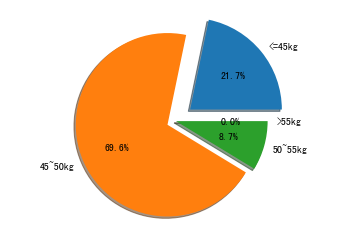

In [14]:
import matplotlib.pyplot as plt
import numpy as np 
import json
import matplotlib.font_manager as font_manager
#显示matplotlib生成的图形
%matplotlib inline

with open('work/stars_info.json', 'r', encoding='UTF-8') as file:
         json_array = json.loads(file.read())

#绘制选手体重分布饼状图
weights = []
counts = []

for star in json_array:
    if 'weight' in dict(star).keys():
        weight = float(star['weight'][0:2])
        weights.append(weight)
print(weights)

size_list = []
count_list = []

size1 = 0
size2 = 0
size3 = 0
size4 = 0

for weight in weights:
    if weight <=45:
        size1 += 1
    elif 45 < weight <= 50:
        size2 += 1
    elif 50 < weight <= 55:
        size3 += 1
    else:
        size4 += 1

labels = '<=45kg', '45~50kg', '50~55kg', '>55kg'

sizes = [size1, size2, size3, size4]
explode = (0.2, 0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal') 
plt.savefig('/home/aistudio/work/pie_result01.jpg')
plt.show()

[(45, 50], (45, 50], (0, 45], (45, 50], (45, 50], ..., (45, 50], (45, 50], (45, 50], (45, 50], (0, 45]]
Length: 23
Categories (4, interval[int64]): [(0, 45] < (45, 50] < (50, 55] < (55, 100]]
sizes (45, 50]     16
(0, 45]       5
(50, 55]      2
(55, 100]     0
dtype: int64


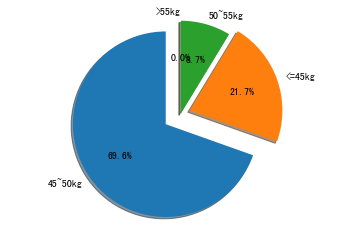

In [15]:

import matplotlib.pyplot as plt
import numpy as np 
import json
import matplotlib.font_manager as font_manager
import pandas as pd
#显示matplotlib生成的图形
%matplotlib inline

df = pd.read_json('work/stars_info.json')
# print(df)
weights=df['weight']
arrs = weights.values

arrs = [x for x in arrs if not pd.isnull(x)]
for i in range(len(arrs)):   
    arrs[i] = float(arrs[i][0:2])

#pandas.cut用来把一组数据分割成离散的区间。比如有一组年龄数据，可以使用pandas.cut将年龄数据分割成不同的年龄段并打上标签。bins是被切割后的区间.
bin=[0,45,50,55,100]
se1=pd.cut(arrs,bin)
print(se1)

#pandas的value_counts()函数可以对Series里面的每个值进行计数并且排序。
pd.value_counts(se1)

sizes = pd.value_counts(se1)
print("sizes",sizes)
labels = '45~50kg', '<=45kg','50~55kg', '>55kg'
explode = (0.2, 0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.savefig('/home/aistudio/work/pie_result02.jpg') 
plt.show()



## #####请在下面cell中完成作业，对《乘风破浪的姐姐》参赛嘉宾的身高分布情况进行可视化分析，绘制身高分布饼状图#####

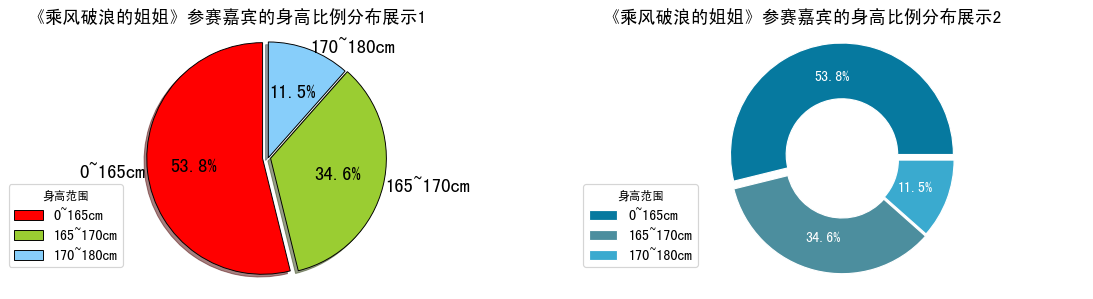

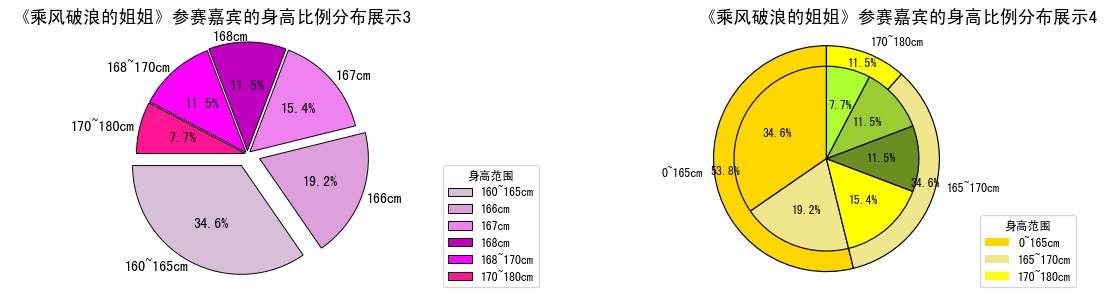

In [78]:
import matplotlib.pyplot as plt
import numpy as np 
import json
import matplotlib.font_manager as font_manager
import pandas as pd
#显示matplotlib生成的图形
%matplotlib inline

df = pd.read_json('work/stars_info.json')
# print(df)
heights=df['height']
arrs = heights.values
arrs = [x for x in arrs if not pd.isnull(x)]
for i in range(len(arrs)):   
    arrs[i] = float(arrs[i][0:3])

#pandas.cut用来把一组数据分割成离散的区间。比如有一组年龄数据，可以使用pandas.cut将年龄数据分割成不同的年龄段并打上标签。bins是被切割后的区间.
bin=[0,165,170,180]
se1=pd.cut(arrs,bin)
# print(se1)

#pandas的value_counts()函数可以对Series里面的每个值进行计数并且排序。
pd.value_counts(se1)

sizes = pd.value_counts(se1)
# print("sizes",sizes)
labels = '0~165cm', '165~170cm','170~180cm'
explode = (0.05, 0.02, 0)  

_, (ax1,ax) = plt.subplots(1,2,figsize=(16, 4),dpi=85)
# fig1, ax1 = plt.subplots(figsize=(11, 5),dpi=100)
colors = ['red','yellowgreen','lightskyblue']

ax1.pie(sizes , explode=explode , labels = labels , autopct='%1.1f%%' , shadow=True, 
colors = colors , startangle=90 , labeldistance = 1.02 , textprops = {'fontsize':16, 'color':'k'},
pctdistance = 0.6 , wedgeprops = {'linewidth': 0.8 , 'edgecolor':'black'})
# ax1.legend(loc='upper left', title="身高范围", fontsize=12,frameon=True, fancybox=True, framealpha=0.2, borderpad=0.3,
#            ncol=1, markerfirst=True, markerscale=1, numpoints=1, handlelength=3.5)
ax1.legend(title="身高范围",fontsize=12,bbox_to_anchor=(0.2, 0.4), loc=1, borderaxespad=0)
ax1.axis('equal')
ax1.set_title('《乘风破浪的姐姐》参赛嘉宾的身高比例分布展示1',fontsize = 15,fontweight='heavy',loc ='left')


colors2=['#06799f', '#4c8e9e','#3aaacf','#33cccc', '#91cdcb']
wedges, texts, autotexts = ax.pie(x=sizes,
                                  labels=labels,
                                  autopct='%1.1f%%',   #autopct后面跟的两种形式这种格式就是 像12.3%的百分比一位小数
                                #   autopct=lambda pct: func(pct ,recipe_data),
                                  explode=explode,
                                  colors=colors2,
                                  pctdistance=0.7,
                                  textprops={'fontsize':16, 'color':'w'},  # 设置白色会看不到圆外部的文字（背景是白色）
                                  # 设置环的比例占一半
                                  wedgeprops = {'width': 0.5, 'linewidth': 1, 'edgecolor':'w'}
                                  )
# ax.legend(loc='upper left', title="身高范围",fontsize=12,frameon=True, fancybox=True, framealpha=0.2, borderpad=0.3,
#            ncol=1, markerfirst=True, markerscale=1, numpoints=1, handlelength=3.5)
ax.legend(title="身高范围",fontsize=12,bbox_to_anchor=(0.2, 0.4), loc=1, borderaxespad=0)
plt.setp(autotexts, size=12, weight="bold")    # 文字的大小之类
ax.axis('equal')
ax.set_title('《乘风破浪的姐姐》参赛嘉宾的身高比例分布展示2',fontsize = 15,fontweight='heavy',loc ='left')
plt.savefig('/home/aistudio/work/pie_result03.jpg')
####################################################################################################
bin=[160,165,166,167,168,170,180]
se1=pd.cut(arrs,bin)
pd.value_counts(se1)
sizes1 = pd.value_counts(se1)
labels1 = '160~165cm','166cm','167cm','168cm','168~170cm','170~180cm'
explode = (0.12, 0.12, 0.03, 0.03, 0.02, 0.02) 
# print("sizes",sizes)

_, (ax2,ax3) = plt.subplots(1,2,figsize=(16, 4),dpi=85)
colors = ['thistle','plum','violet','m','magenta','deeppink']

ax2.pie(sizes1 ,  explode = explode, labels = labels1 , autopct='%1.1f%%' , shadow=False, 
        colors = colors , startangle=180 , labeldistance = 1.05 , textprops = {'fontsize':12, 'color':'k'},
        pctdistance = 0.6 , wedgeprops = {'linewidth': 0.8 , 'edgecolor':'black'})
# ax2.legend(loc='upper left', fontsize=7, title="身高范围", frameon=True, fancybox=True, framealpha=0.2, borderpad=0.3,
#            ncol=1, markerfirst=True, markerscale=1, numpoints=1, handlelength=3.5)
ax2.legend(title="身高范围",fontsize=10,bbox_to_anchor=(0.9, 0), loc=3, borderaxespad=0)
ax2.axis('equal')
ax2.set_title('《乘风破浪的姐姐》参赛嘉宾的身高比例分布展示3',fontsize = 15,fontweight='heavy',loc ='left')


colors = ['gold','khaki','yellow','olivedrab','yellowgreen','greenyellow']
pie_1 = ax3.pie(sizes,startangle=90,autopct='%1.1f%%',radius=1.1,textprops = {'fontsize':10, 'color':'k'},pctdistance = 0.9,colors=colors, labels=labels)
pie_2 = ax3.pie(sizes1,startangle=90,autopct='%1.1f%%',radius=0.9,textprops = {'fontsize':10, 'color':'k'},pctdistance = 0.6,colors=colors)
# ax3.legend(loc='upper left', fontsize=7, frameon=True, fancybox=True, framealpha=0.1, borderpad=0.2,  
#            ncol=1, markerfirst=True, markerscale=1, numpoints=1, handlelength=2.5)
ax3.legend(title="身高范围",fontsize=10,bbox_to_anchor=(1.1, 0), loc=3, borderaxespad=0)
#添加多重饼图的分割线
for pie_wedge in pie_1[0]:
    pie_wedge.set_edgecolor('black')
for pie_wedge in pie_2[0]:
    pie_wedge.set_edgecolor('black')
ax3.set(aspect="equal")
ax3.set_title('《乘风破浪的姐姐》参赛嘉宾的身高比例分布展示4',fontsize = 15,fontweight='heavy',loc ='left')


plt.savefig('/home/aistudio/work/pie_result04.jpg') 
plt.show()
